# **연령별 관심사 조사**

가구주 연령별 가구당 월평균 가계수지 전국 1인이상(https://kosis.kr/index/index.do)

In [158]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import font_manager
import numpy as np
import pandas as pd

## 폰트 변경

In [159]:
# 폰트 매니저로 폰트 찾기
file_list = font_manager.findSystemFonts()

In [160]:
# 폰트 이름과 파일 경로 저장
data_list = []

for i in file_list:
        fprop = font_manager.FontProperties(fname = i)
        data_list.append({"name": fprop.get_name(), "file": fprop.get_file()})

df = pd.DataFrame(data_list)
df

,name,file
0,Agency FB,C:\Windows\Fonts\AGENCYR.TTF
1,Microsoft YaHei,C:\Windows\Fonts\msyhbd.ttc
2,Ink Free,C:\Windows\Fonts\Inkfree.ttf
3,Modern No. 20,C:\Windows\Fonts\MOD20.TTF
4,UnDotum,C:\Windows\Fonts\UnDotum.ttf
...,...,...
372,HYPost-Medium,C:\Windows\Fonts\H2PORM.TTF
373,Candara,C:\Windows\Fonts\Candaraz.ttf
374,Rockwell Condensed,C:\Windows\Fonts\ROCCB___.TTF
375,Kunstler Script,C:\Windows\Fonts\KUNSTLER.TTF


In [161]:
# 폰트가 다른 곳에 저장 되어 있다면 첫 번째 경로 데이터만 저장
font_df = df.groupby('name', as_index = False).first()
font_df

,name,file
0,Agency FB,C:\Windows\Fonts\AGENCYR.TTF
1,Algerian,C:\Windows\Fonts\ALGER.TTF
2,Ami R,C:\Windows\Fonts\HMKMAMI.TTF
3,Arial,C:\Windows\Fonts\ARIALN.TTF
4,Arial Rounded MT Bold,C:\Windows\Fonts\ARLRDBD.TTF
...,...,...
205,Wingdings,C:\Windows\Fonts\wingding.ttf
206,Wingdings 2,C:\Windows\Fonts\WINGDNG2.TTF
207,Wingdings 3,C:\Windows\Fonts\WINGDNG3.TTF
208,Yet R,C:\Windows\Fonts\HMFMOLD.TTF


In [162]:
# 고딕채 선택해서 찾기
font_filtered_df = font_df[font_df['name'].str.contains('Gothic')]
font_filtered_df

,name,file
30,Century Gothic,C:\Windows\Fonts\GOTHICBI.TTF
38,Copperplate Gothic Bold,C:\Windows\Fonts\COPRGTB.TTF
39,Copperplate Gothic Light,C:\Windows\Fonts\COPRGTL.TTF
55,Franklin Gothic Book,C:\Windows\Fonts\FRABK.TTF
56,Franklin Gothic Demi,C:\Windows\Fonts\FRADM.TTF
57,Franklin Gothic Demi Cond,C:\Windows\Fonts\FRADMCN.TTF
58,Franklin Gothic Heavy,C:\Windows\Fonts\FRAHVIT.TTF
59,Franklin Gothic Medium,C:\Windows\Fonts\framdit.ttf
60,Franklin Gothic Medium Cond,C:\Windows\Fonts\FRAMDCN.TTF
77,HYGothic-Extra,C:\Windows\Fonts\H2GTRE.TTF


In [163]:
# 폰트 경로 설정
font_path = 'C:/Windows/Fonts/NanumGothicExtraBold.ttf'
font_name = 'NanumGothic'

font_manager.fontManager.addfont(font_path)

# 폰트 설정
plt.rcParams['font.family'] = 'NanumGothic'

## 데이터 전처리

In [165]:
# 엑셀 파일 불러오기
xlsx_file = '가구주_연령별_가구당_월평균_가계수지__전국_1인이상__20230531135713.xlsx'

In [166]:
df = pd.read_excel(xlsx_file)

In [167]:
df.head()

,가구주연령별,가계수지항목별,2022.4/4,Unnamed: 3,Unnamed: 4,2023.1/4,Unnamed: 6,Unnamed: 7
0,NaN,NaN,전체가구,근로자가구,근로자외가구,전체가구,근로자가구,근로자외가구
1,전체 평균,가구원수 (명),2.33,2.44,2.16,2.27,2.39,2.09
2,NaN,가구주연령 (세),52.27,47.73,59.56,52.73,47.73,60.41
3,NaN,가구분포 (%),100,100,100,100,100,100
4,NaN,소득,4833575,5464131,3822462,5053853,6055393,3517428


In [171]:
csv_file = 'csv_file.xlsx'

In [172]:
# csv 파일로 변경
df.to_csv(csv_file, index=False)

In [173]:
df1 = pd.read_csv('csv_file.csv')

In [174]:
# 데이터 확인
df1.head()

,가구주연령별,가계수지항목별,2022.4/4,Unnamed: 3,Unnamed: 4,2023.1/4,Unnamed: 6,Unnamed: 7
0,NaN,NaN,전체가구,근로자가구,근로자외가구,전체가구,근로자가구,근로자외가구
1,전체 평균,가구원수 (명),2.33,2.44,2.16,2.27,2.39,2.09
2,NaN,가구주연령 (세),52.27,47.73,59.56,52.73,47.73,60.41
3,NaN,가구분포 (%),100,100,100,100,100,100
4,NaN,소득,4833575,5464131,3822462,5053853,6055393,3517428


In [175]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   가구주연령별      6 non-null      object
 1   가계수지항목별     174 non-null    object
 2   2022.4/4    175 non-null    object
 3   Unnamed: 3  175 non-null    object
 4   Unnamed: 4  175 non-null    object
 5   2023.1/4    175 non-null    object
 6   Unnamed: 6  175 non-null    object
 7   Unnamed: 7  175 non-null    object
dtypes: object(8)
memory usage: 11.1+ KB


In [ ]:
# '가구주연령별'행의 칼럼을 나이별로 구하기 위해 Nat a Number 값을 바로 아래 값으로 채워준다.
df['가구주연령별'].fillna(method='ffill', inplace=True)
df

,가구주연령별,가계수지항목별,2022.4/4,Unnamed: 3,Unnamed: 4,2023.1/4,Unnamed: 6,Unnamed: 7
0,NaN,NaN,전체가구,근로자가구,근로자외가구,전체가구,근로자가구,근로자외가구
1,전체 평균,가구원수 (명),2.33,2.44,2.16,2.27,2.39,2.09
2,전체 평균,가구주연령 (세),52.27,47.73,59.56,52.73,47.73,60.41
3,전체 평균,가구분포 (%),100,100,100,100,100,100
4,전체 평균,소득,4833575,5464131,3822462,5053853,6055393,3517428
...,...,...,...,...,...,...,...,...
170,65세이상 가구,비소비지출,427982,488989,401667,522167,602135,491099
171,65세이상 가구,처분가능소득,2562224,2955320,2392666,2292820,2948472,2038102
172,65세이상 가구,흑자액,829031,1102283,711166,507189,919140,347147
173,65세이상 가구,흑자율 (%),32.4,37.3,29.7,22.1,31.2,17


In [ ]:
# 데이터 확인
df1['가구주연령별'].unique()

array([nan, '전체 평균', '39세이하가구', '40~49세가구', '50~59세가구', '60세이상 가구',
       '65세이상 가구'], dtype=object)

In [ ]:
# 39세이하가구 데이터 추출
Group_df1 = df[df['가구주연령별'] == '39세이하가구']
Group_df1

,가구주연령별,가계수지항목별,2022.4/4,Unnamed: 3,Unnamed: 4,2023.1/4,Unnamed: 6,Unnamed: 7
30,39세이하가구,가구원수 (명),2.01,2.02,1.99,1.91,1.9,1.95
31,39세이하가구,가구주연령 (세),32.06,32.22,31.42,31.63,31.61,31.71
32,39세이하가구,가구분포 (%),23.4,30.2,12.48,22.91,30.03,12
33,39세이하가구,소득,4345025,4624279,3261465,4869789,5291478,3250282
34,39세이하가구,경상소득,4278107,4555756,3200777,4797287,5229988,3135489
35,39세이하가구,근로소득,3387106,4199040,"236,647",3846150,4759427,338692
36,39세이하가구,사업소득,582432,109284,2418336,498213,77262,2114883
37,39세이하가구,재산소득,"4,317","3,950","5,744","4,158","3,699","5,923"
38,39세이하가구,이전소득,304252,243482,540050,448765,389600,675991
39,39세이하가구,비경상소득,66918,68523,"60,688","72,502","61,490","114,793"


In [ ]:
# 40대가구 데이터 추출
Group_df2 = df[df['가구주연령별'] == '40~49세가구']
Group_df2

,가구주연령별,가계수지항목별,2022.4/4,Unnamed: 3,Unnamed: 4,2023.1/4,Unnamed: 6,Unnamed: 7
59,40~49세가구,가구원수 (명),3.04,3.06,3,3,3.02,2.93
60,40~49세가구,가구주연령 (세),44.48,44.36,44.86,44.49,44.36,44.91
61,40~49세가구,가구분포 (%),20.36,25,12.9,19.51,24.77,11.43
62,40~49세가구,소득,6063190,6397084,5025803,6661819,7229405,4774911
63,40~49세가구,경상소득,5981972,6311641,4957713,6542460,7085915,4735777
64,40~49세가구,근로소득,4495444,5716997,700159,5043362,6312720,823454
65,40~49세가구,사업소득,1092233,274738,3632135,873587,238121,2986159
66,40~49세가구,재산소득,"6,456","7,732","2,493","13,446","16,250","4,125"
67,40~49세가구,이전소득,387839,312174,622926,612065,518824,922038
68,40~49세가구,비경상소득,81218,85443,"68,091","119,358","143,490","39,135"


In [ ]:
# '가계수지항목별'에서 원하는 소비 종류를 찾기위해 앞에 번호가 적혀있는 행만 추출
filtered_df1 = Group_df1[Group_df1['가계수지항목별'].str.match('^\d') & ~df['가계수지항목별'].isna()]
filtered_df1.head()

C:\Users\rhlab\AppData\Local\Temp\ipykernel_25304\3141115001.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df1 = Group_df1[Group_df1['가계수지항목별'].str.match('^\d') & ~df['가계수지항목별'].isna()]


,가구주연령별,가계수지항목별,2022.4/4,Unnamed: 3,Unnamed: 4,2023.1/4,Unnamed: 6,Unnamed: 7
42,39세이하가구,01.식료품 · 비주류음료,267599,271825,251200,258231,259926,251717
43,39세이하가구,02.주류 · 담배,41156,41241,40828,37438,38635,32840
44,39세이하가구,03.의류 · 신발,174943,178227,162201,135288,142491,107621
45,39세이하가구,04.주거 · 수도 · 광열,294075,277441,358616,402361,399268,414238
46,39세이하가구,05.가정용품 · 가사서비스,115158,120462,94577,124357,135715,80734


In [ ]:
filtered_df2 = Group_df2[Group_df2['가계수지항목별'].str.match('^\d') & ~df['가계수지항목별'].isna()]
filtered_df2.head()

C:\Users\rhlab\AppData\Local\Temp\ipykernel_25304\2111520233.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_df2 = Group_df2[Group_df2['가계수지항목별'].str.match('^\d') & ~df['가계수지항목별'].isna()]


,가구주연령별,가계수지항목별,2022.4/4,Unnamed: 3,Unnamed: 4,2023.1/4,Unnamed: 6,Unnamed: 7
71,40~49세가구,01.식료품 · 비주류음료,456817,463530,435959,450972,456675,432010
72,40~49세가구,02.주류 · 담배,45717,45911,45113,45926,46899,42692
73,40~49세가구,03.의류 · 신발,236575,243861,213937,186233,187783,181079
74,40~49세가구,04.주거 · 수도 · 광열,310056,310366,309096,425533,418299,449582
75,40~49세가구,05.가정용품 · 가사서비스,149312,143602,167052,129548,134298,113757


In [ ]:
# 빈 칼럼 삭제
filtered_df1.drop(['Unnamed: 3','Unnamed: 4','Unnamed: 6','Unnamed: 7'],axis=1, inplace=True,errors='ignore')
filtered_df1

C:\Users\rhlab\AppData\Local\Temp\ipykernel_25304\234877890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1.drop(['Unnamed: 3','Unnamed: 4','Unnamed: 6','Unnamed: 7'],axis=1, inplace=True,errors='ignore')


,가구주연령별,가계수지항목별,2022.4/4,2023.1/4
42,39세이하가구,01.식료품 · 비주류음료,267599,258231
43,39세이하가구,02.주류 · 담배,41156,37438
44,39세이하가구,03.의류 · 신발,174943,135288
45,39세이하가구,04.주거 · 수도 · 광열,294075,402361
46,39세이하가구,05.가정용품 · 가사서비스,115158,124357
47,39세이하가구,06.보건,140403,158609
48,39세이하가구,07.교통,357326,283411
49,39세이하가구,08.통신,130444,125020
50,39세이하가구,09.오락 · 문화,197396,233443
51,39세이하가구,10.교육,134298,145676


In [ ]:
filtered_df2.drop(['Unnamed: 3','Unnamed: 4','Unnamed: 6','Unnamed: 7'],axis=1, inplace=True,errors='ignore')
filtered_df2

C:\Users\rhlab\AppData\Local\Temp\ipykernel_25304\179707722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df2.drop(['Unnamed: 3','Unnamed: 4','Unnamed: 6','Unnamed: 7'],axis=1, inplace=True,errors='ignore')


,가구주연령별,가계수지항목별,2022.4/4,2023.1/4
71,40~49세가구,01.식료품 · 비주류음료,456817,450972
72,40~49세가구,02.주류 · 담배,45717,45926
73,40~49세가구,03.의류 · 신발,236575,186233
74,40~49세가구,04.주거 · 수도 · 광열,310056,425533
75,40~49세가구,05.가정용품 · 가사서비스,149312,129548
76,40~49세가구,06.보건,227127,259247
77,40~49세가구,07.교통,468331,465865
78,40~49세가구,08.통신,167121,173197
79,40~49세가구,09.오락 · 문화,229830,236328
80,40~49세가구,10.교육,498495,584727


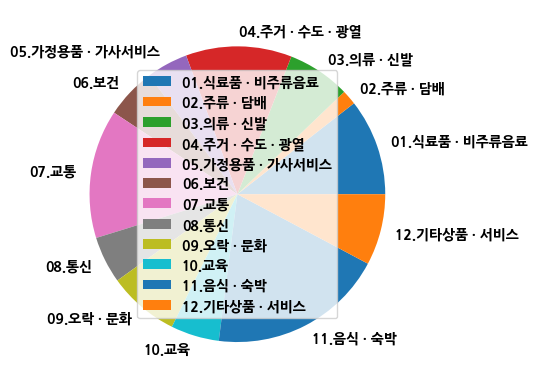

In [176]:
# 파이 차트 색깔별 종류
plt.pie(filtered_df1['2022.4/4'], labels=filtered_df1['가계수지항목별'])
plt.legend(filtered_df1['가계수지항목별'])

In [177]:
# 퍼짐 정도 값 설정
exp = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]

Text(0.5, 1.0, '-39세 이하 관심사-')

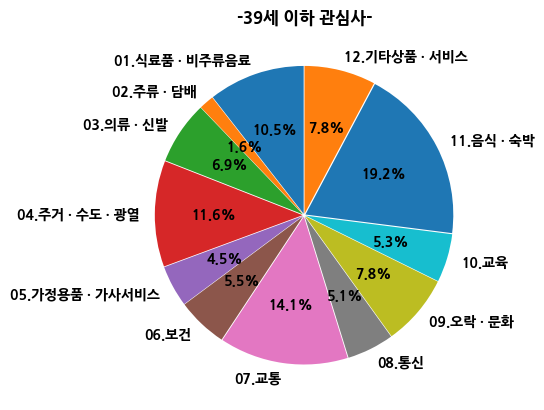

In [ ]:
# 39세 이하 관심사 차트 
plt.pie(filtered_df1['2022.4/4'], labels=filtered_df1['가계수지항목별'],startangle=90, explode=exp, autopct='%.1f%%')
plt.title('-39세 이하 관심사-')

Text(0.5, 1.0, '-40~49세 관심사-')

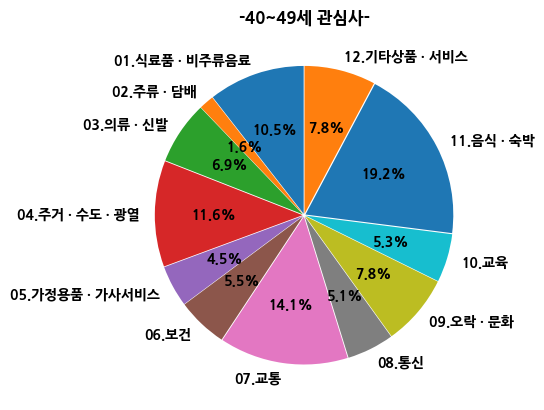

In [ ]:
# 40대 관심사 차트
plt.pie(filtered_df1['2022.4/4'], labels=filtered_df1['가계수지항목별'], startangle=90, explode=exp, autopct='%.1f%%')
plt.title('-40~49세 관심사-')